<a href="https://colab.research.google.com/github/Mahdi-Kahrizi/MachinLearning2023/blob/main/%5CFinal_Exam%5CFinal_Emami_Moghaddam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
!pip install --upgrade --no-cach-dir gdown
! 1-8G4uzPLxrYIoeMkgAdZNpzUqo1GqqZr


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
/bin/bash: line 1: 1-8G4uzPLxrYIoeMkgAdZNpzUqo1GqqZr: command not found


In [ ]:
dataset = pd.read_csv('/content/MJMusicDataset.csv', encoding='ISO-8859-1')
dataset


,name,dastgah,instrument,zero_corssing,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,spectral_rolloff_var,chroma_1_mean,chroma_2_mean,...,mfcc_11_var,mfcc_12_var,mfcc_13_var,mfcc_14_var,mfcc_15_var,mfcc_16_var,mfcc_17_var,mfcc_18_var,mfcc_19_var,mfcc_20_var
0,ney-mahoor-ebrahimi .mp3,D_2,I_4,65545,1938.040517,303472.4474,2815.166310,1.754412e+06,0.515210,0.158007,...,482.619965,274.530334,257.260315,200.793167,177.008484,89.304535,49.159683,83.412254,154.657501,417.060425
1,Mohammad_Shojaei_nei_Mahoor.mp3,D_2,I_4,59788,1956.981873,774951.2677,2971.032035,2.082504e+06,0.209722,0.335278,...,435.338196,289.941559,337.219269,266.507416,256.131317,153.390289,90.073257,120.354729,206.031006,267.015015
2,Arash_Samimi_nei_Mahoor.mp3,D_2,I_4,85072,2735.525193,575671.7929,4268.615855,2.663909e+06,0.105867,0.108526,...,299.526794,226.705948,163.451355,140.664673,104.658630,72.048088,53.397228,83.085548,190.668487,331.626526
3,19 sarebaang mahoor.mp3,D_2,I_4,89980,2629.389833,406198.9319,4071.233715,1.005496e+06,0.153988,0.098157,...,305.978638,154.510696,281.793976,348.872650,156.062454,85.470512,45.904568,120.363800,370.077820,306.180878
4,Amjadian.mp3,D_2,I_4,58134,1659.262559,332341.1003,2789.041468,8.496746e+05,0.077795,0.036009,...,81.764854,106.146141,103.081779,85.252548,90.831291,150.201111,332.417633,299.858795,177.197845,186.112488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,04- Dastgahe Segah (Dariush Safvat).mp3,D_1,I_3,58713,1962.963101,271920.3527,3971.409319,1.610546e+06,0.333098,0.462040,...,81.730835,65.873344,73.287697,61.341614,60.234592,45.930950,55.934483,79.716232,58.860054,63.929264
922,setar.mp3,D_1,I_3,76880,2250.524645,239123.6804,3555.770165,2.224720e+06,0.273377,0.446400,...,130.240204,138.122086,146.750397,181.701019,258.374176,278.515472,189.078796,83.102943,121.233650,144.402054
923,Ø¨ÙØ¯Ø§Ø¯ Ø¨Ø§Ø¨Ø§ÛÛ - Ù¾ÛØ´ Ø¯Ø±Ø§ÙÙ Ø¯ ...,D_1,I_3,51127,1773.256221,210447.3008,3243.288722,2.186991e+06,0.432290,0.573922,...,83.879944,86.463821,64.370247,42.082783,54.140324,51.218037,46.243031,62.320683,65.399384,46.119965
924,index.html?VALID=TRUE&attid=43702&VALID=TRUE&q...,D_1,I_3,66481,1548.315758,519856.3787,2582.517717,1.773740e+06,0.108252,0.187435,...,416.817444,237.846649,161.662949,291.663483,208.246979,253.487564,331.774628,118.082359,134.107193,332.380707


In [ ]:
X_data = dataset.iloc[:, 3:]
y_data = dataset.iloc[:, 1]


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 24)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((740, 69), (186, 69), (740,), (186,))

Text(0.5, 1.0, 'Train')

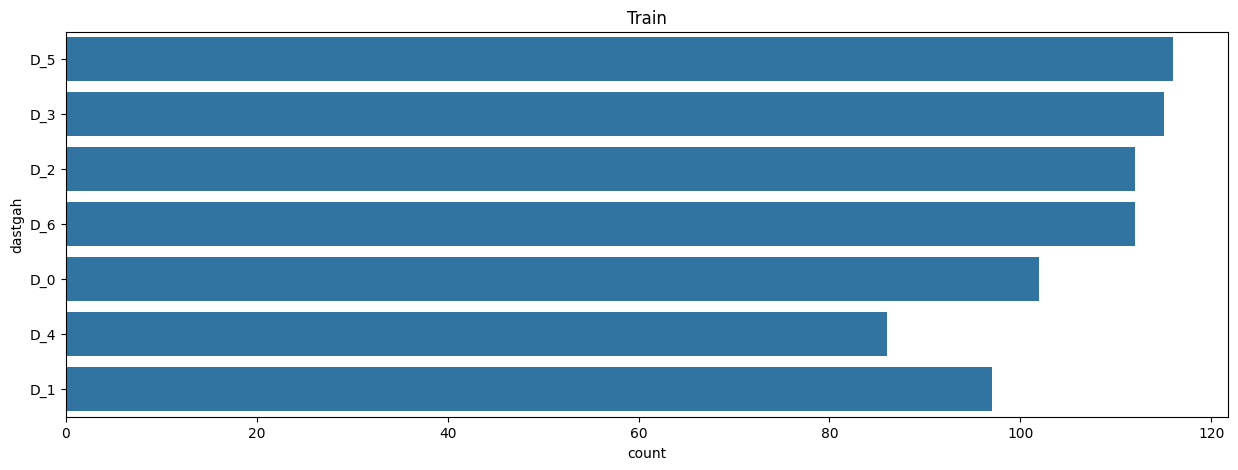

In [ ]:
plt.rcParams["figure.figsize"] = (15, 5)

plt.plot
sb.countplot(data=y_train)
plt.title('Train')



Text(0.5, 1.0, 'Test')

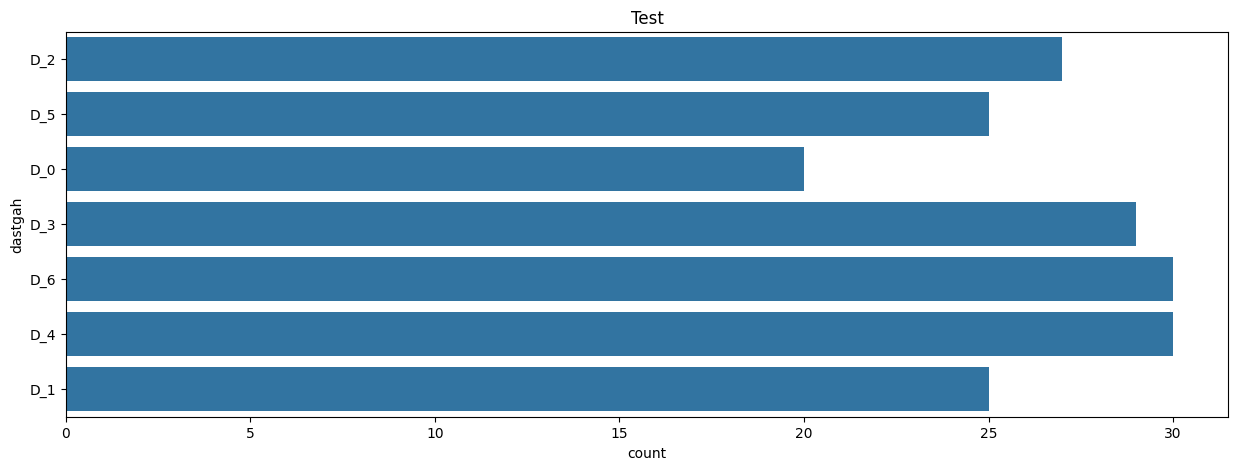

In [ ]:
plt.plot
sb.countplot(data=y_test)
plt.title('Test')

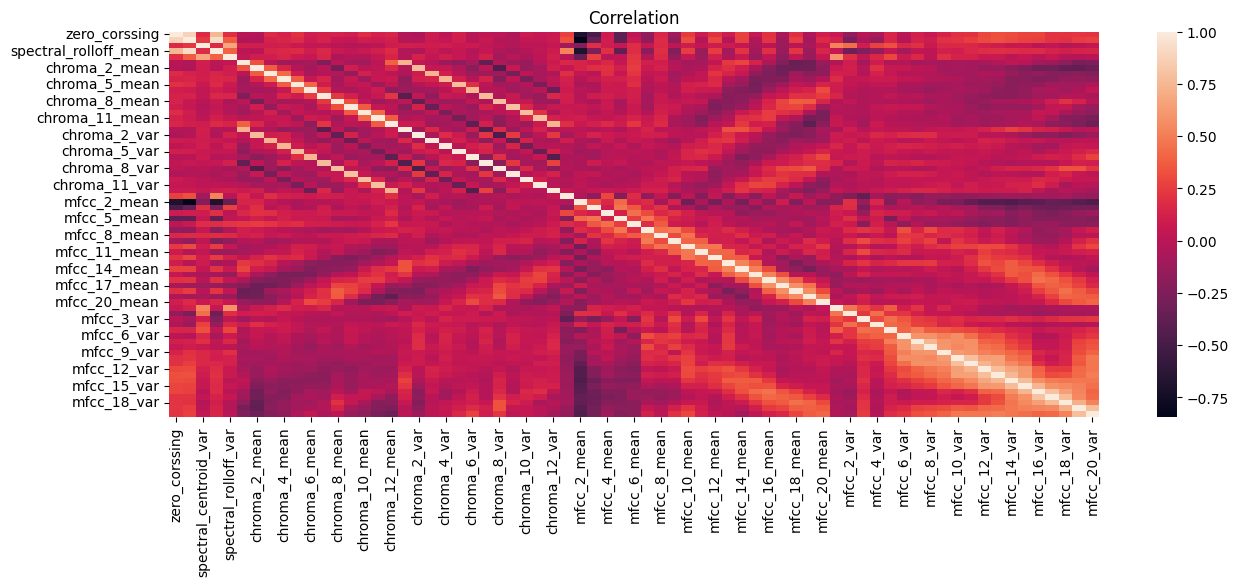

In [ ]:
# plt.rcParams["figure.figsize"] = (15, 10)
sb.heatmap(X.corr(), annot=False);
plt.title('Correlation');

In [ ]:
data_select = VarianceThreshold(threshold=30)
data_select.fit(x_train)
x_train_new = data_select.transform(x_train)
x_test_new = data_select.transform(x_test)

print(x_train.shape, x_train_new.shape)
print(x_test.shape, x_test_new.shape)



(740, 69) (740, 45)
(186, 69) (186, 45)


define SVM

In [ ]:
clf_linear = svm.SVC( kernel='rbf', random_state=14)

clf_linear.fit(x_train_new, y_train)

y_pred_linear = clf_linear.predict(x_test_new)

clf_linear.score(x_test_new, y_test)

0.16129032258064516

Text(0.5, 1.0, 'SVC')

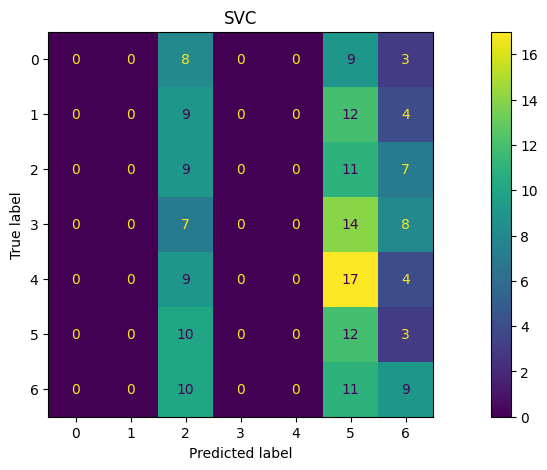

In [ ]:
cm_rbf = confusion_matrix(y_test, y_pred_linear)
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf)
disp_rbf.plot()
plt.title('SVC')

In [ ]:
pca = PCA(n_components=2, random_state=24)
pca.fit(x_train_new)
x_train_pca = pca.transform(x_train_new)
x_test_pca = pca.transform(x_test_new)
print(x_train_pca.shape, x_test_pca.shape)

(740, 2) (186, 2)


Text(0.5, 1.0, 'PCA')

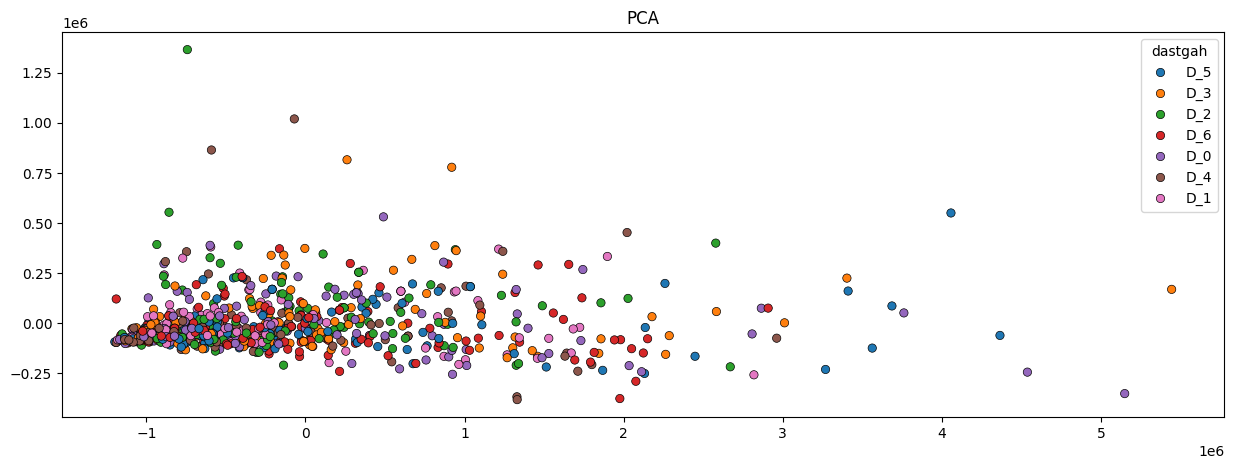

In [ ]:
sb.scatterplot(x=x_train_pca[:, 0], y=x_train_pca[:, 1], hue=y_train, edgecolor='k')
plt.title('PCA')

In [ ]:
lda = LDA(n_components=3)
lda.fit(x_train_new, y_train)
x_train_lda = lda.transform(x_train_new)
x_test_lda = lda.transform(x_test_new)
print(x_train_lda.shape, x_test_lda.shape)

(740, 3) (186, 3)


Text(0.5, 1.0, 'LDA diagram')

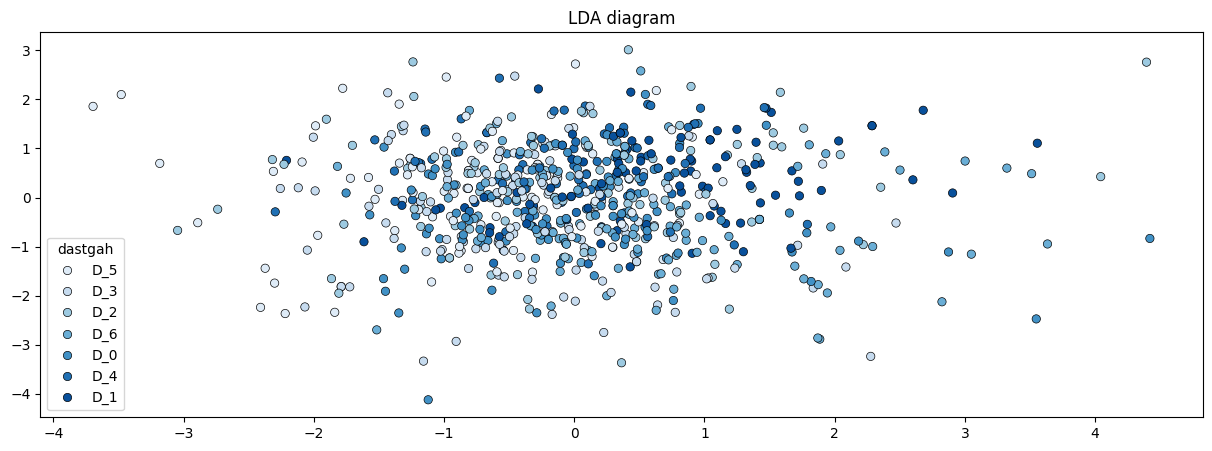

In [ ]:
sb.scatterplot(x=x_train_lda[:, 0], y=x_train_lda[:, 1], hue=y_train, palette='Blues', edgecolor='k')
plt.title('LDA diagram')

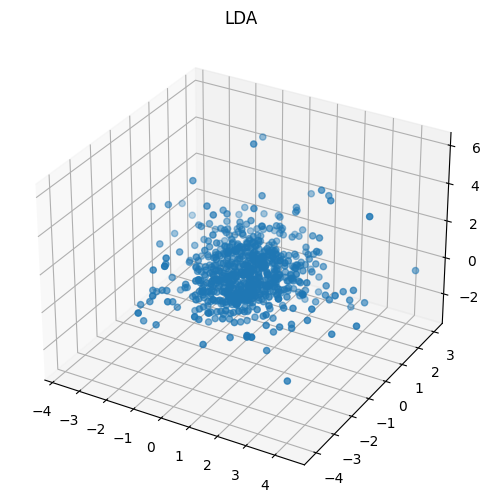

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_train_lda[:, 0], x_train_lda[:, 1], x_train_lda[:, 2])

plt.title('LDA')
plt.show()